In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import pandas as pd
import mplhep as hep
hep.style.use("CMS")
import numpy as np
import os
import glob

In [33]:
path = "phaseSpacePlots/"
fnames = sorted(glob.glob("./phaseSpacePlots/csv/*.csv"), key=lambda name: int(name.split("step")[1].split("_")[0]))
PLOT_TARGETS = [ [os.path.basename(i)[:-4], pd.read_csv(i)] for iF, i in enumerate(fnames)]

In [40]:
STEP_NAMES = ["Input Beam", "Post W1", "Post D1", "Post Reverse Transverse", "Post Drift", "Post No Transverse", "Post RF", "Post Recombine Transverse", "Post W2", "Post W2 Cut", "Post D2"]
PLOTS = [
    [("x", "Px"), ("x (mm)", "p$_{x}$ [MeV]")],
    [("y", "Py"), ("y (mm)", "p$_{y}$ [MeV]")],
    [("t", "Pz"), ("t (ns)", "p$_{z}$ [MeV]")],
    [("x", "Pz"), ("x (mm)", "p$_{z}$ [MeV]")],
    [("y", "Pz"), ("y (mm)", "p$_{z}$ [MeV]")],
]

phaseSpacePlots/pdfs/steps/step0_pre_w1_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step0_pre_w1_y_Py_log.pdf
phaseSpacePlots/pdfs/steps/step0_pre_w1_t_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step0_pre_w1_x_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step0_pre_w1_y_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step1_post_w1_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step1_post_w1_y_Py_log.pdf
phaseSpacePlots/pdfs/steps/step1_post_w1_t_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step1_post_w1_x_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step1_post_w1_y_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step2_post_correct_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step2_post_correct_y_Py_log.pdf
phaseSpacePlots/pdfs/steps/step2_post_correct_t_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step2_post_correct_x_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step2_post_correct_y_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step3_reverse_transverse_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step3_reverse_transverse_y_Py_log.pdf
phaseSpacePlots/pdfs/steps/step3_reverse

/tmp/ipykernel_2415649/3713548298.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(6, 5))


phaseSpacePlots/pdfs/steps/step4_post_drift_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step4_post_drift_y_Py_log.pdf
phaseSpacePlots/pdfs/steps/step4_post_drift_t_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step4_post_drift_x_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step4_post_drift_y_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step5_no_transverse.to_csv_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step5_no_transverse.to_csv_y_Py_log.pdf
phaseSpacePlots/pdfs/steps/step5_no_transverse.to_csv_t_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step5_no_transverse.to_csv_x_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step5_no_transverse.to_csv_y_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step6_post_cavity_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step6_post_cavity_y_Py_log.pdf
phaseSpacePlots/pdfs/steps/step6_post_cavity_t_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step6_post_cavity_x_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step6_post_cavity_y_Pz_log.pdf
phaseSpacePlots/pdfs/steps/step7_pre_w2_x_Px_log.pdf
phaseSpacePlots/pdfs/steps/step7_pre_

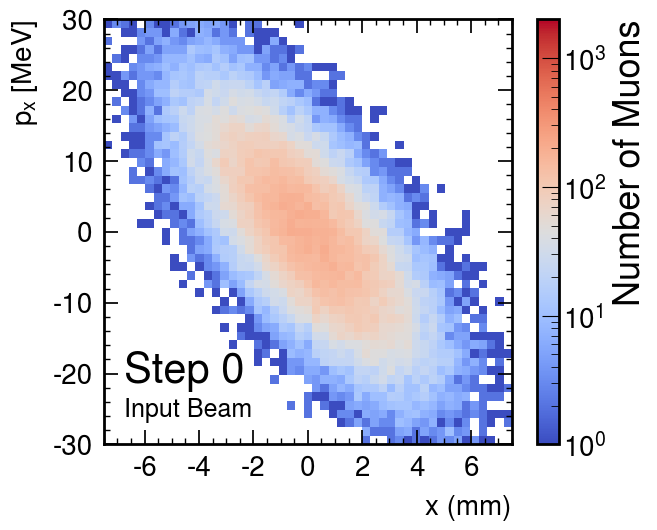

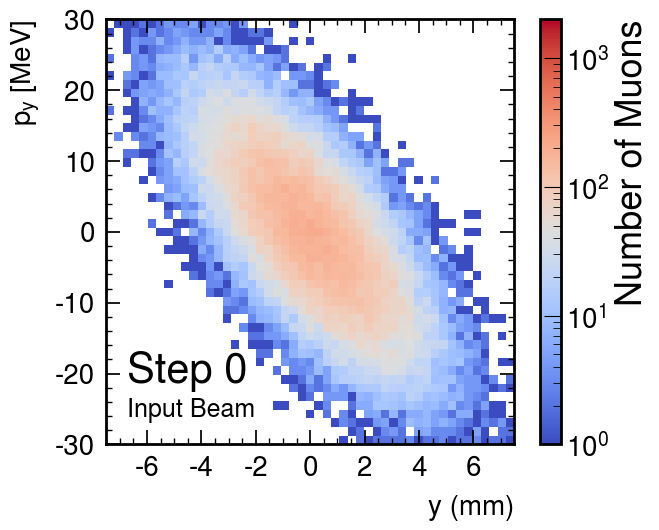

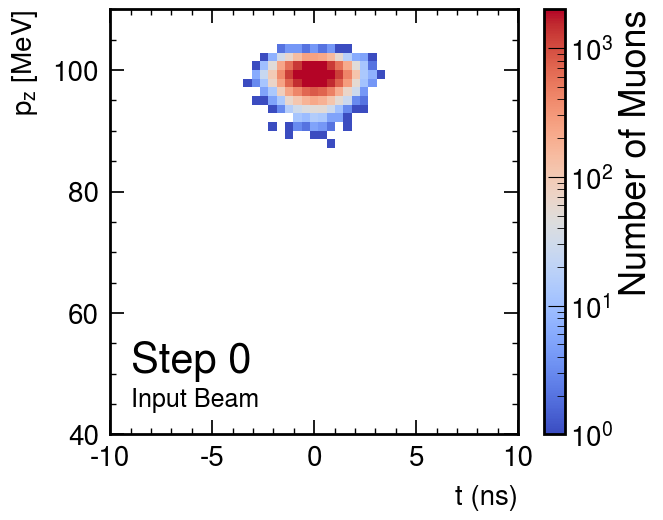

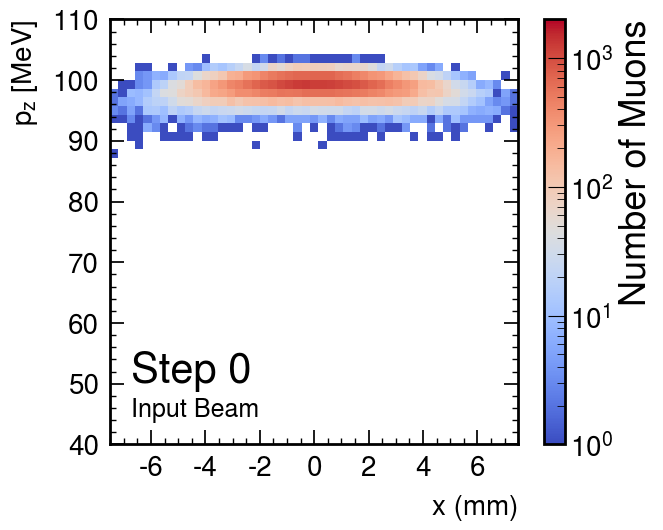

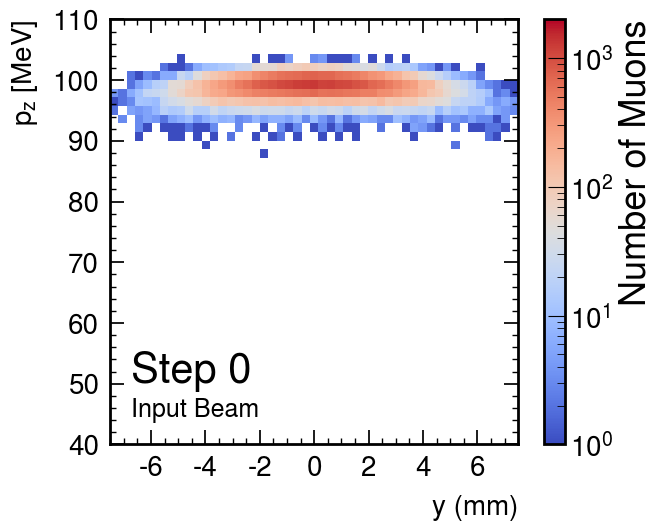

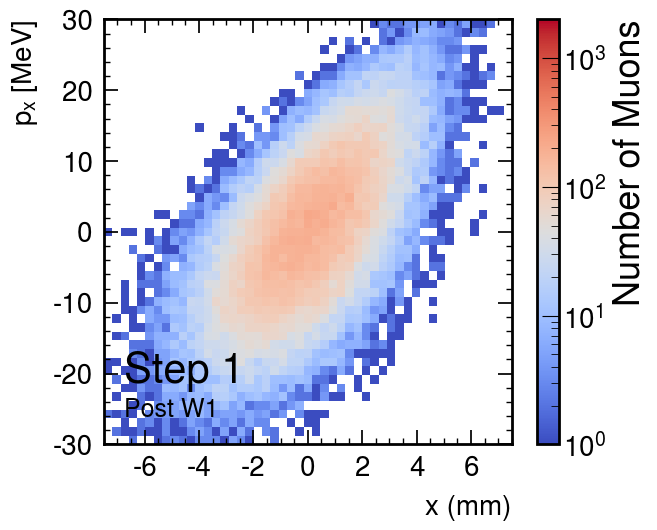

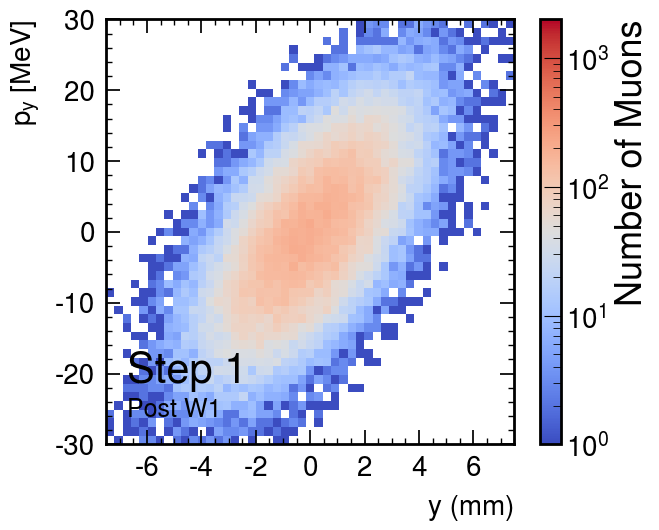

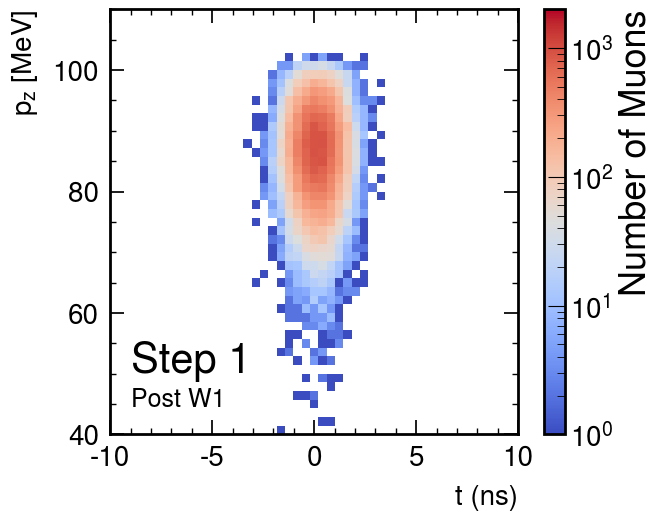

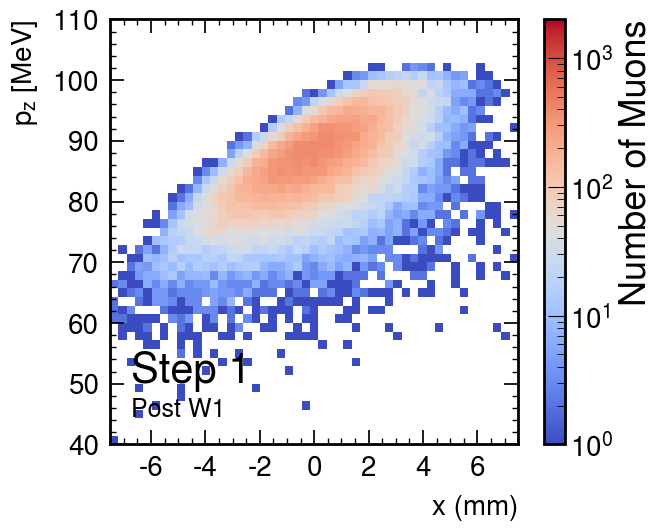

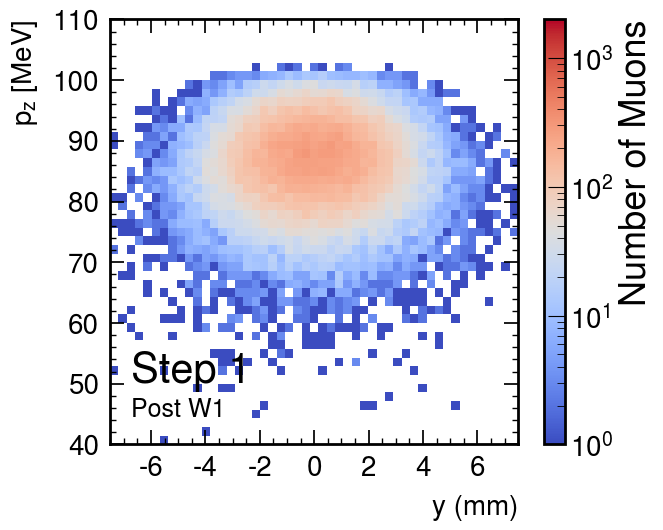

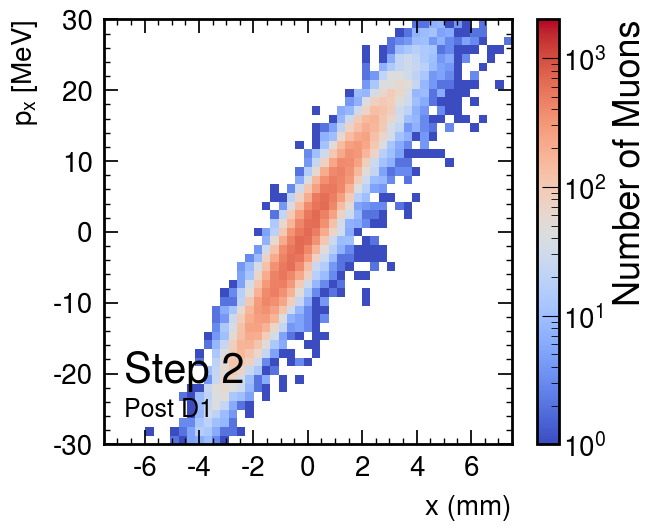

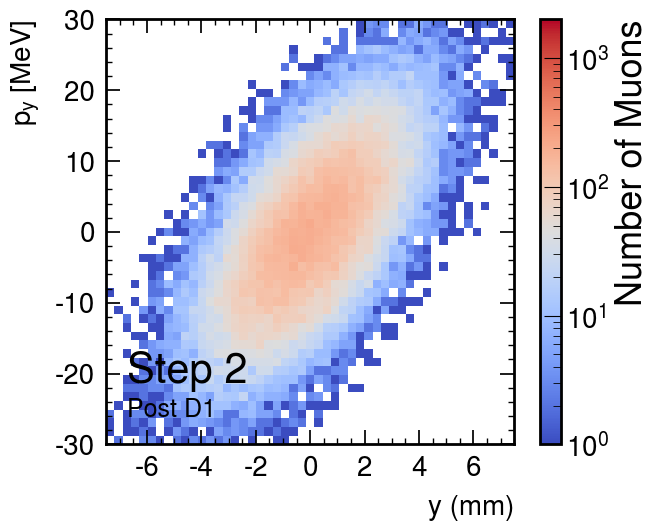

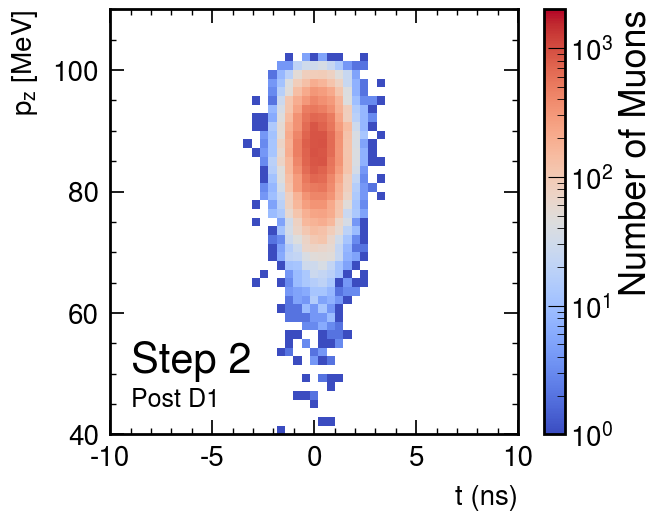

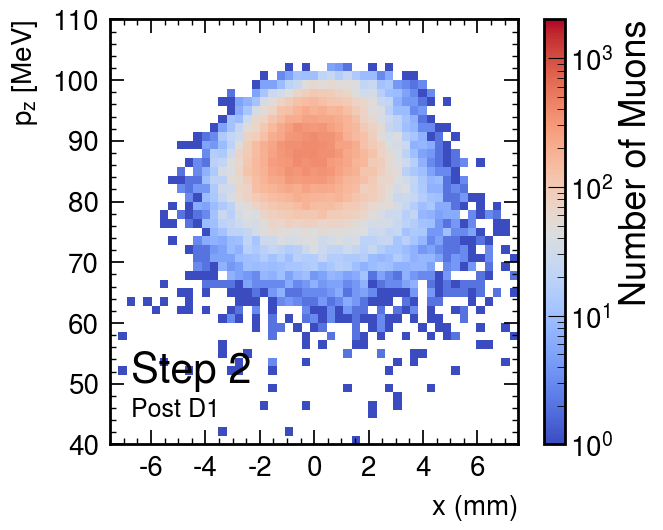

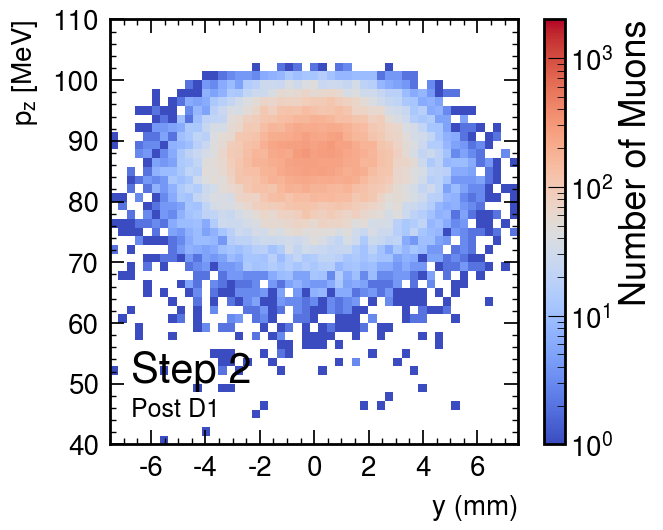

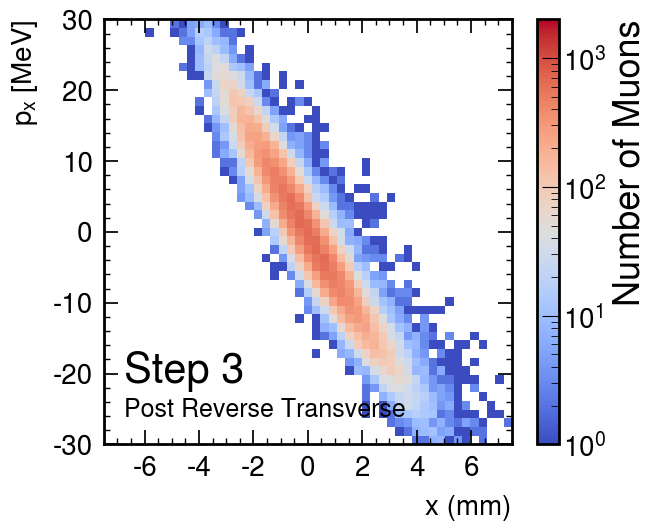

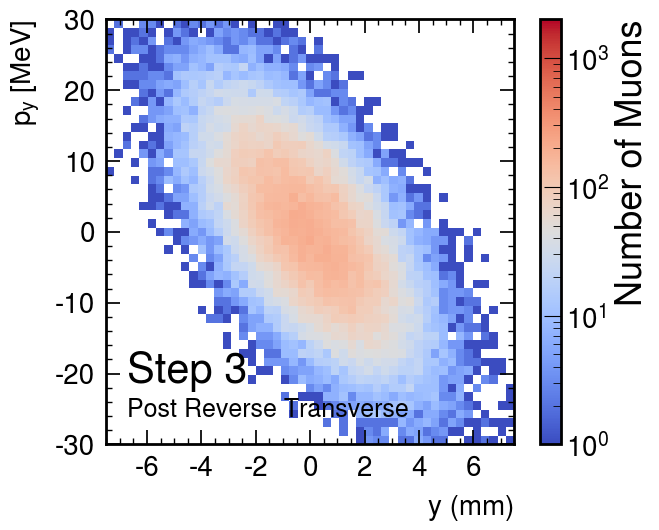

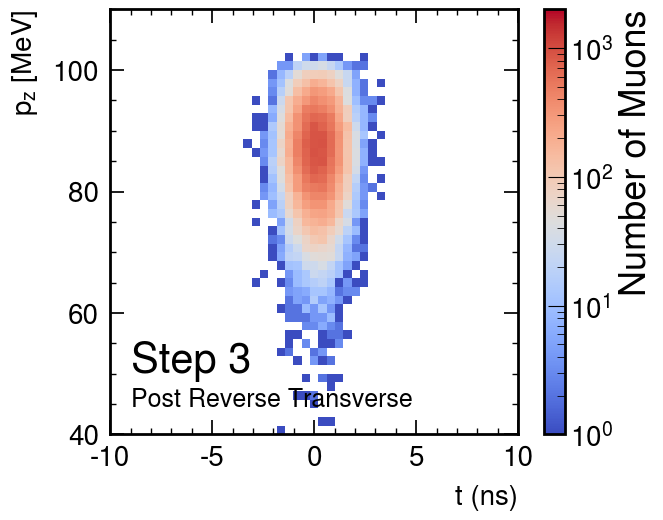

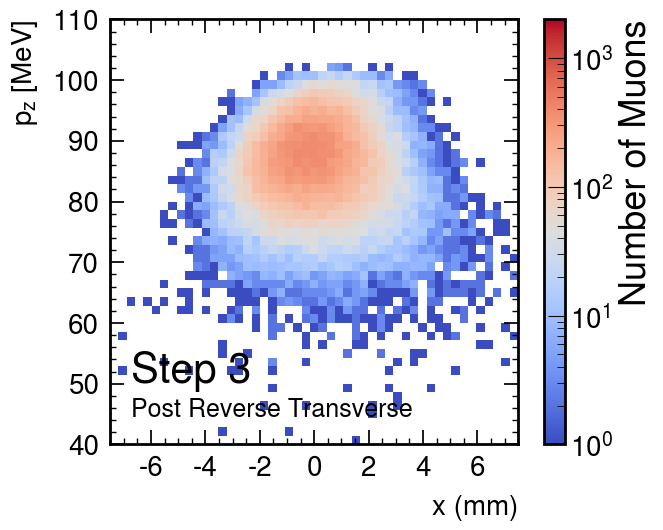

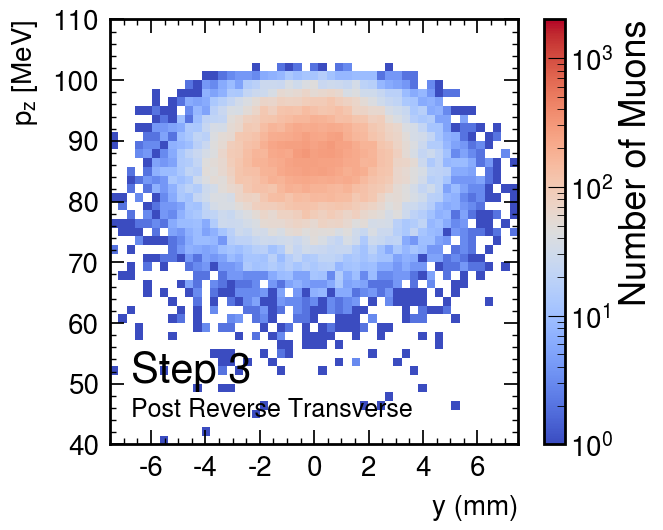

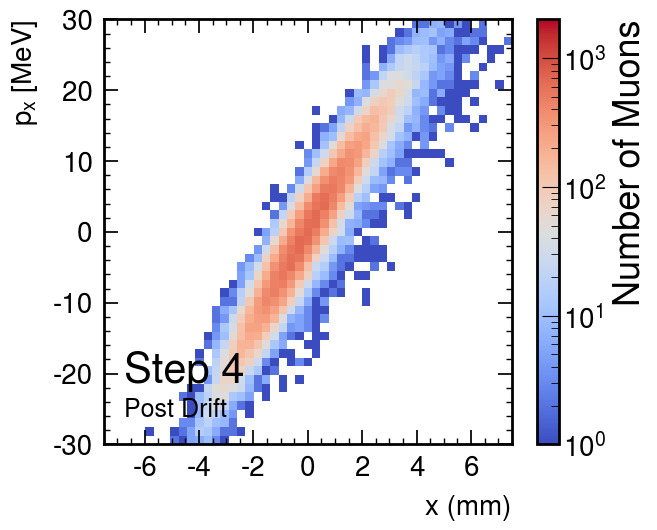

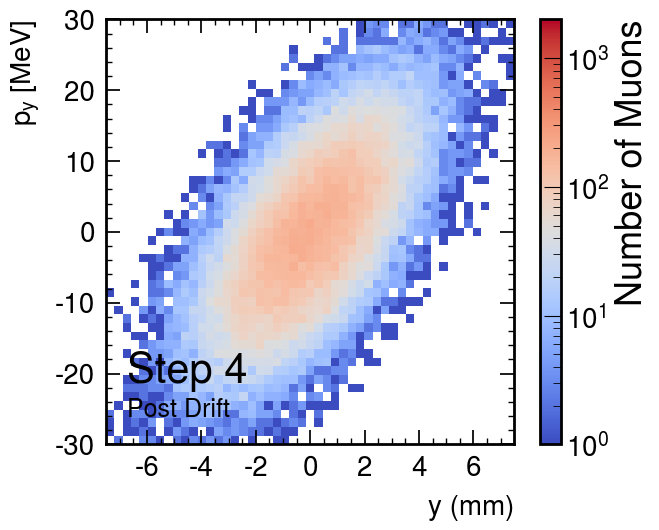

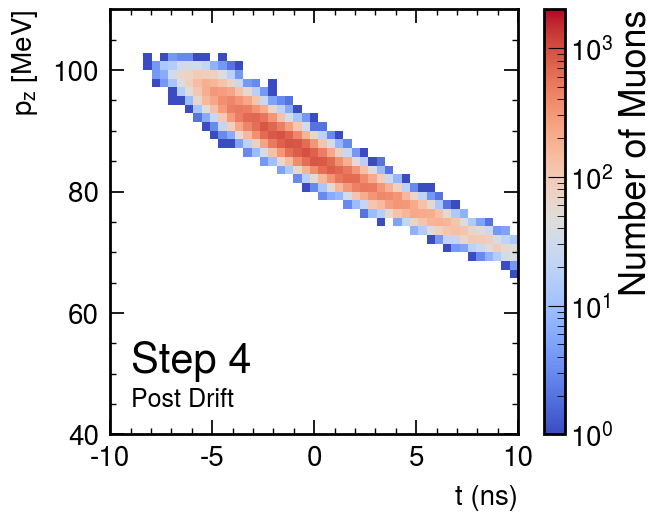

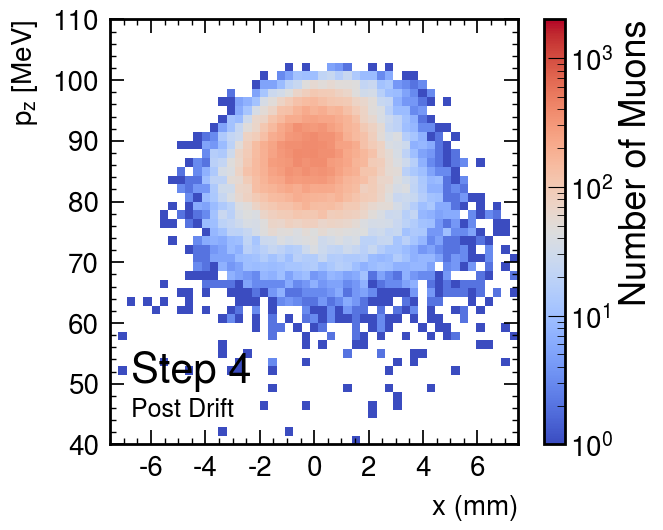

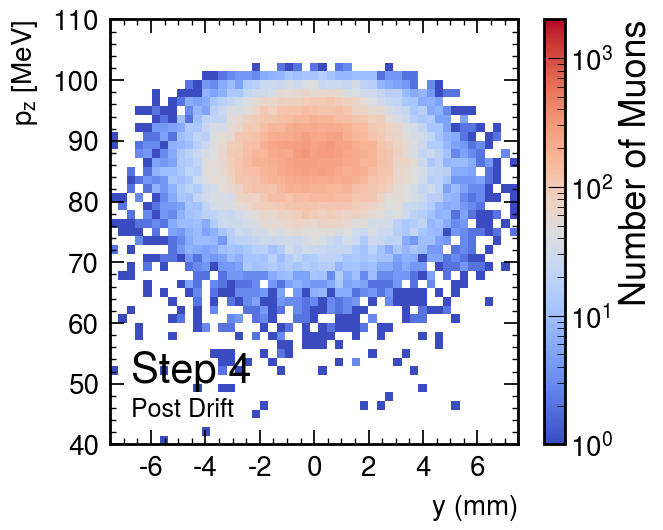

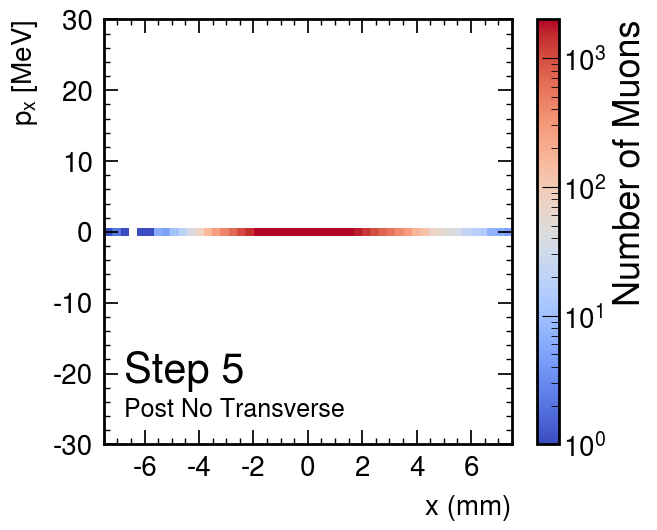

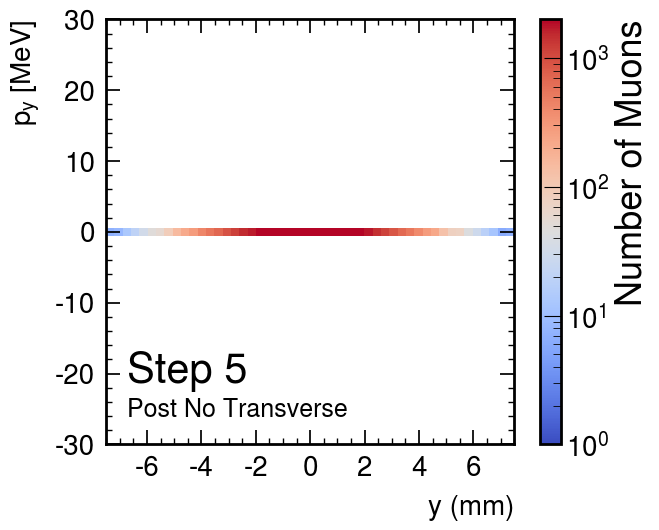

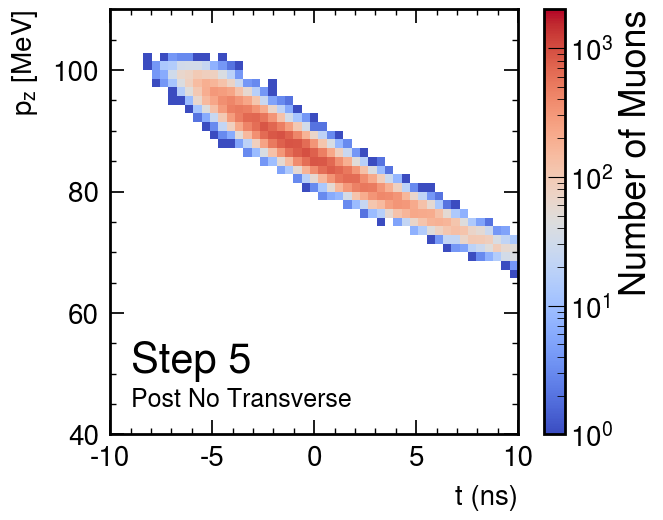

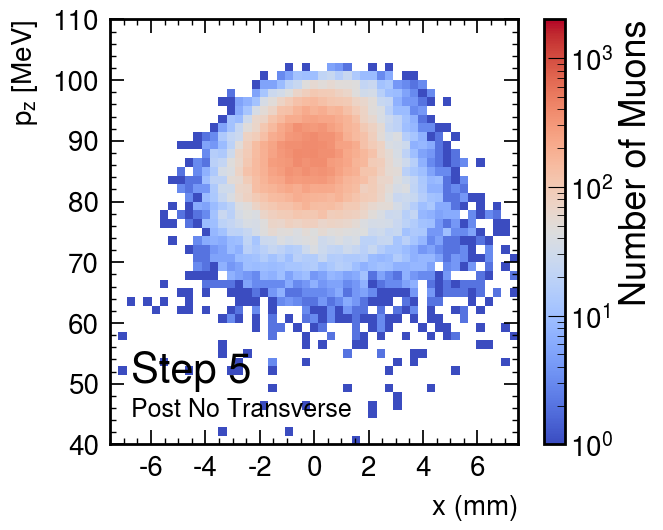

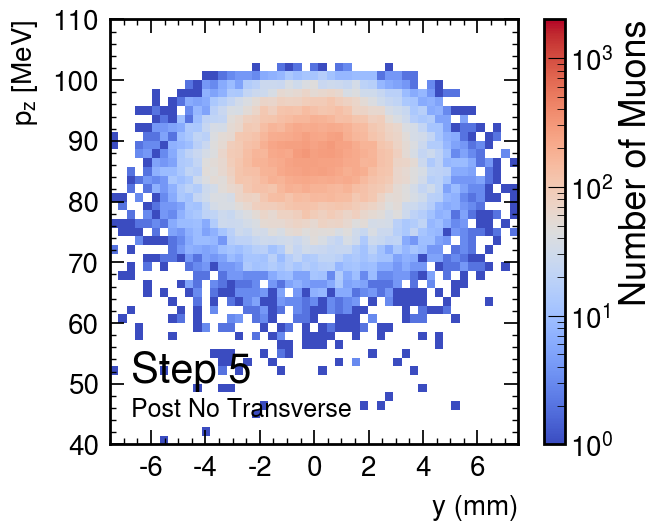

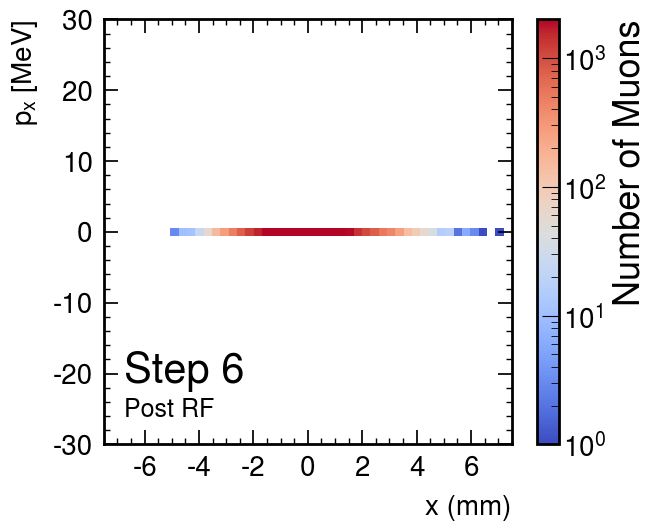

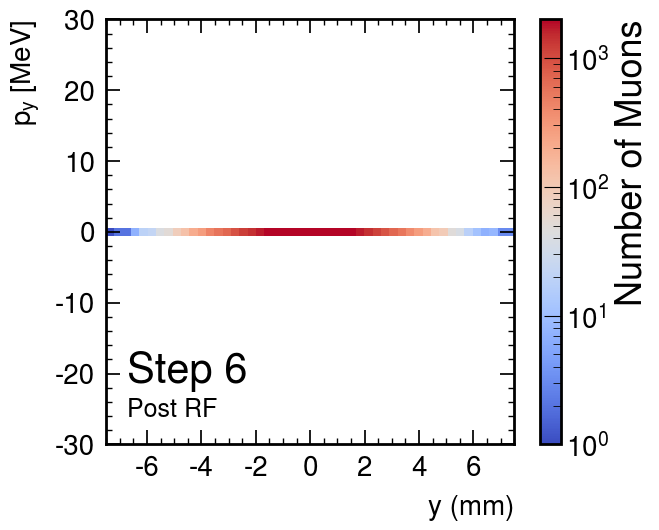

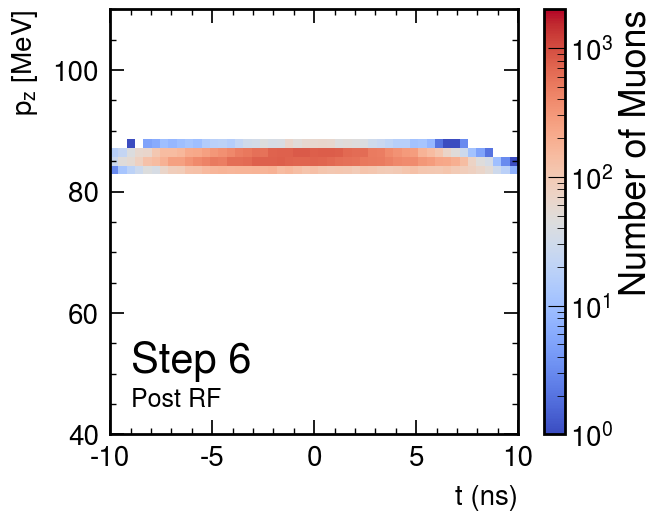

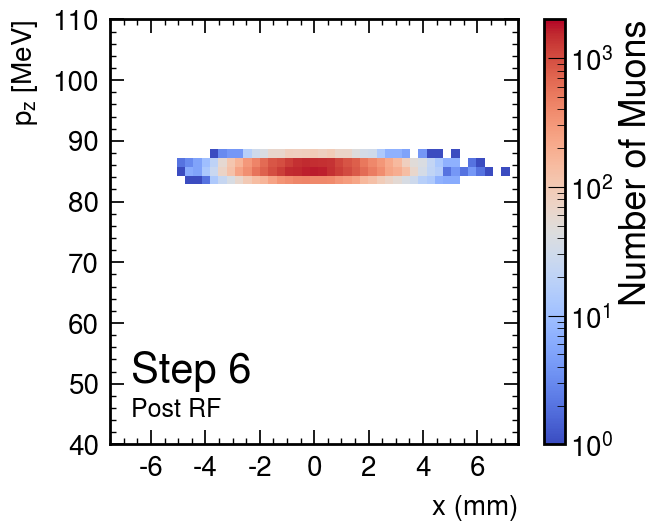

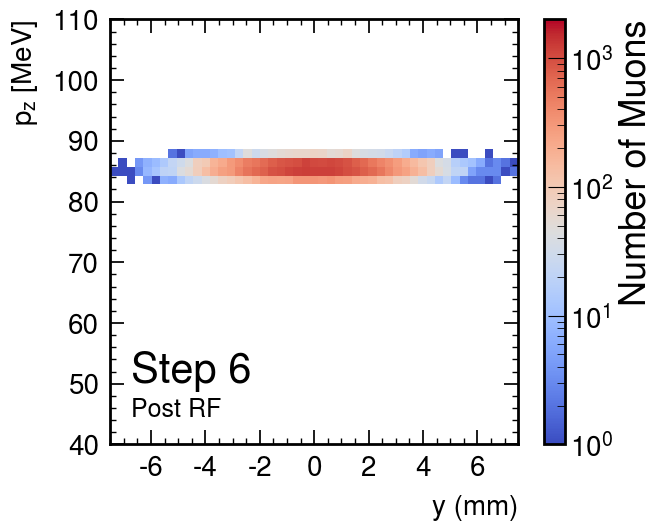

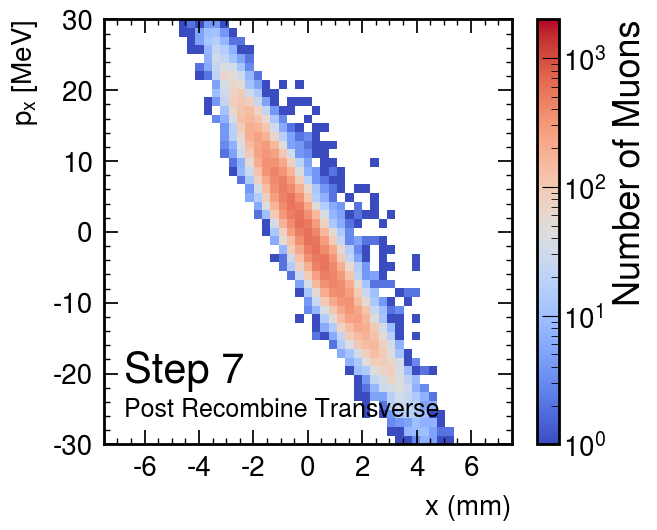

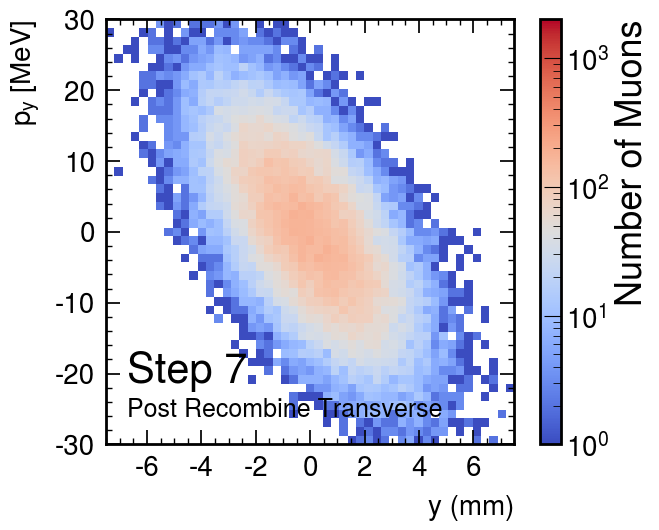

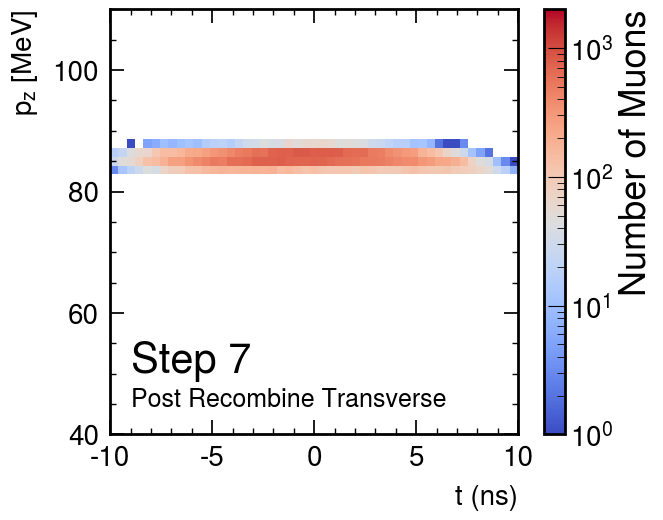

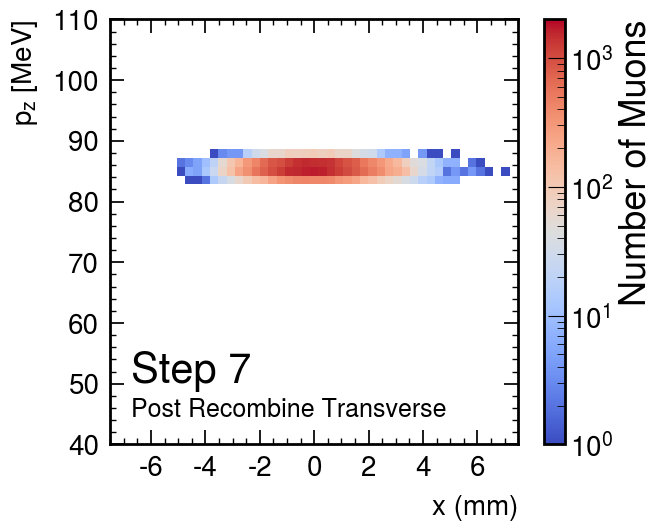

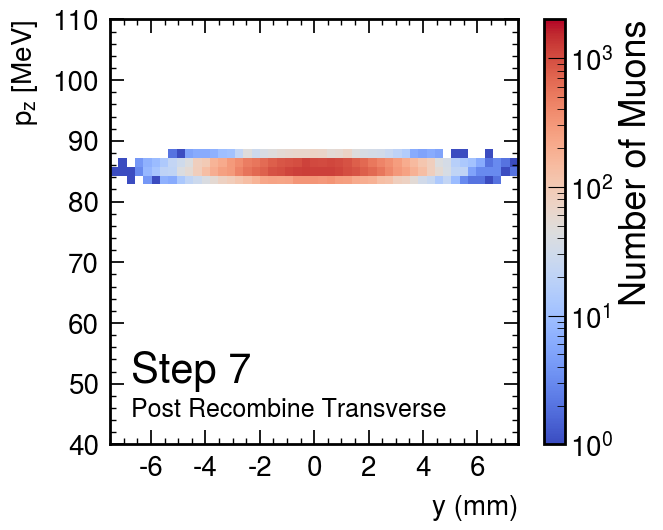

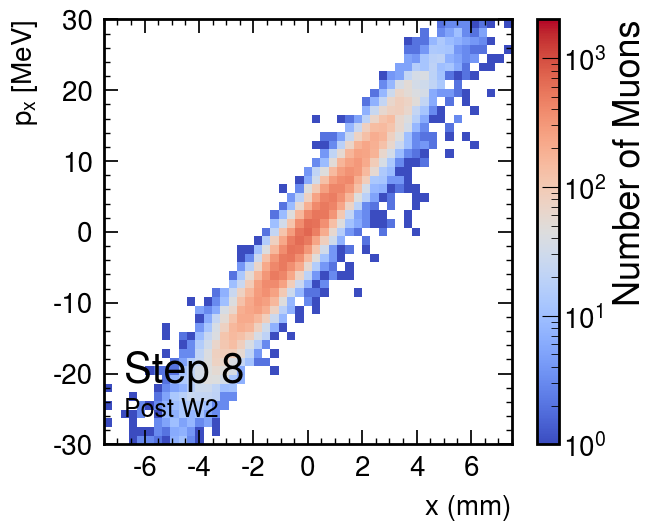

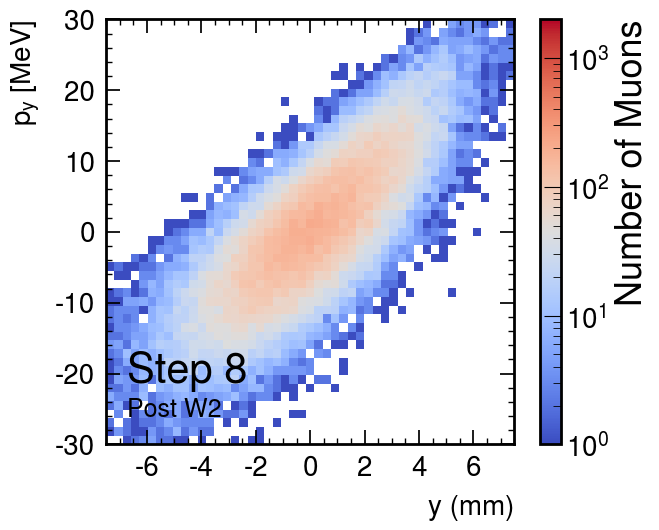

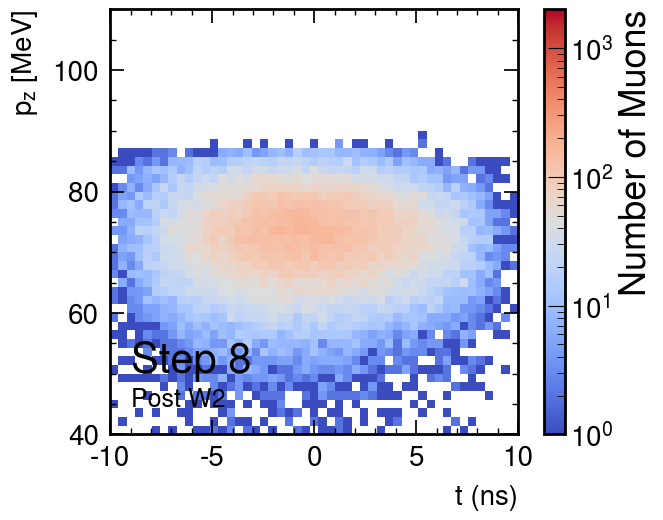

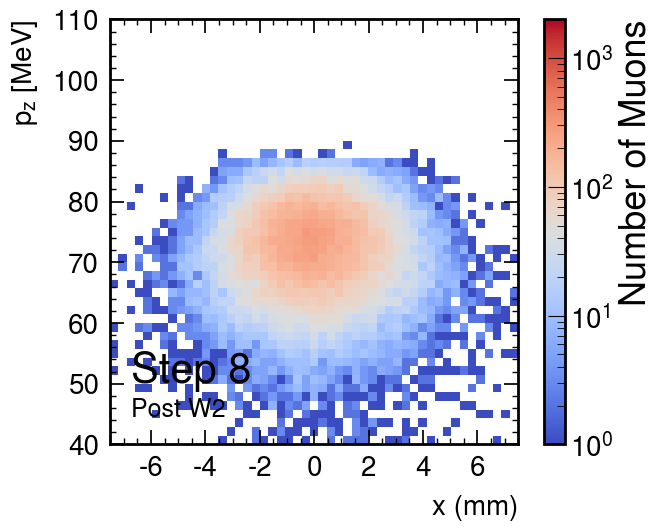

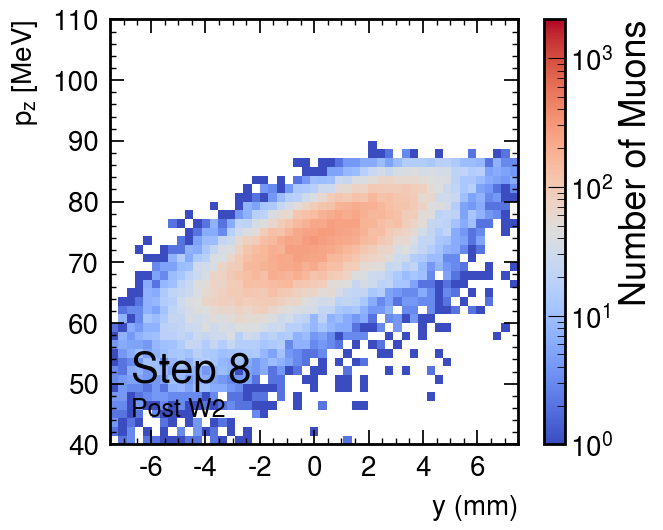

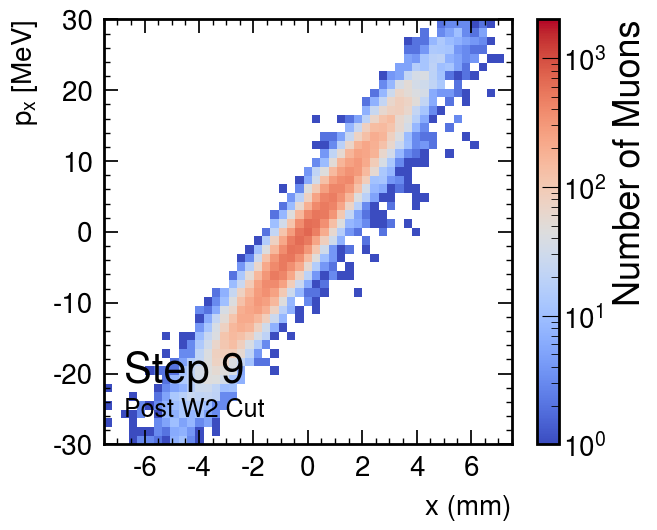

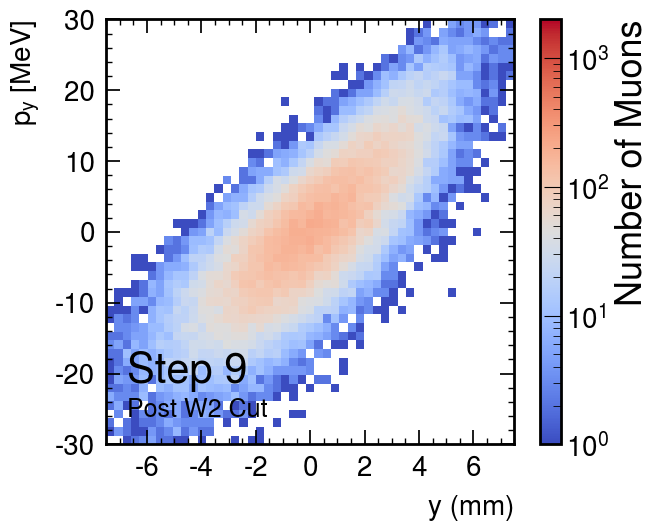

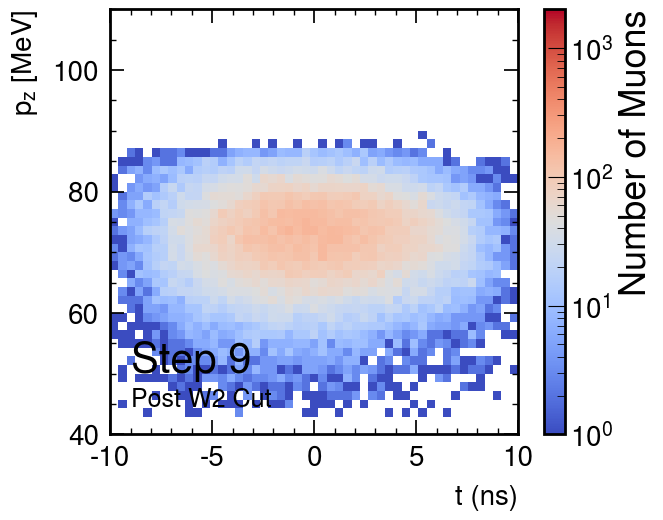

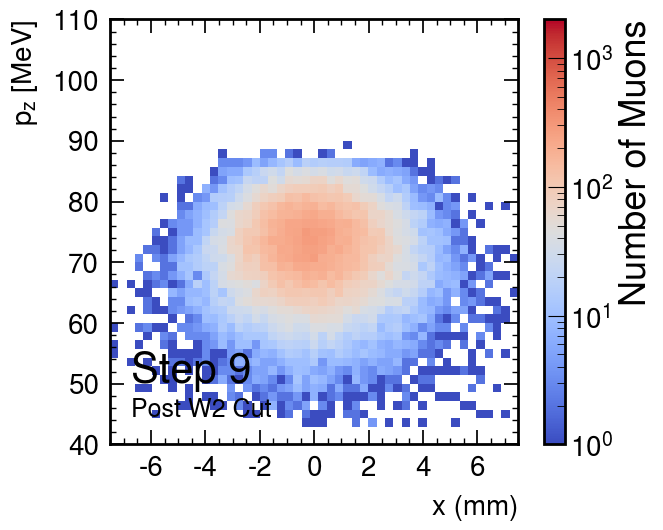

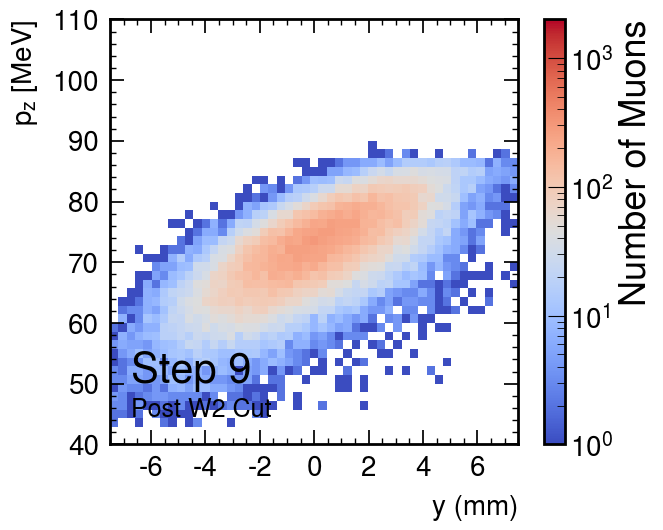

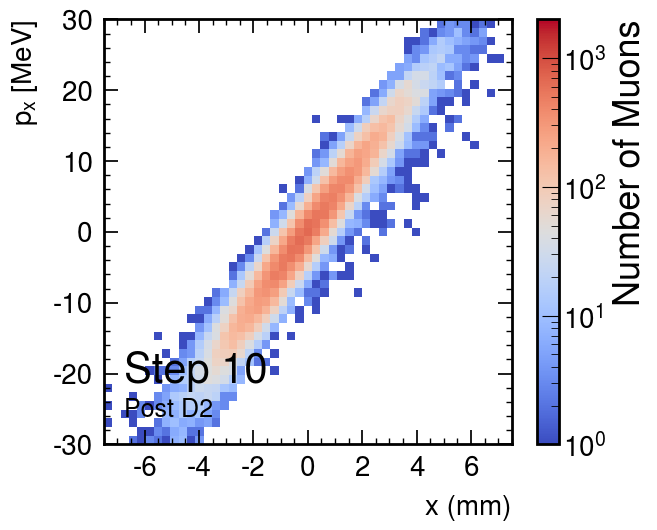

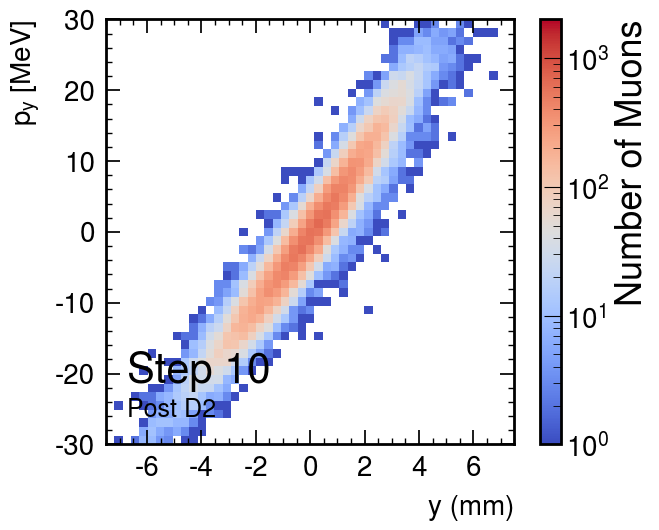

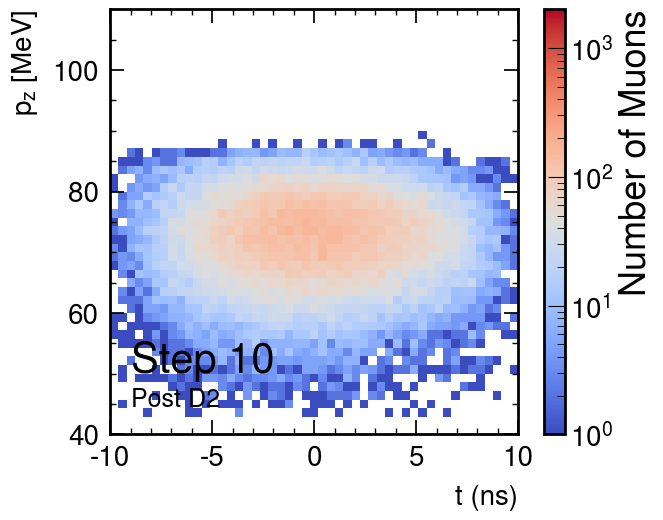

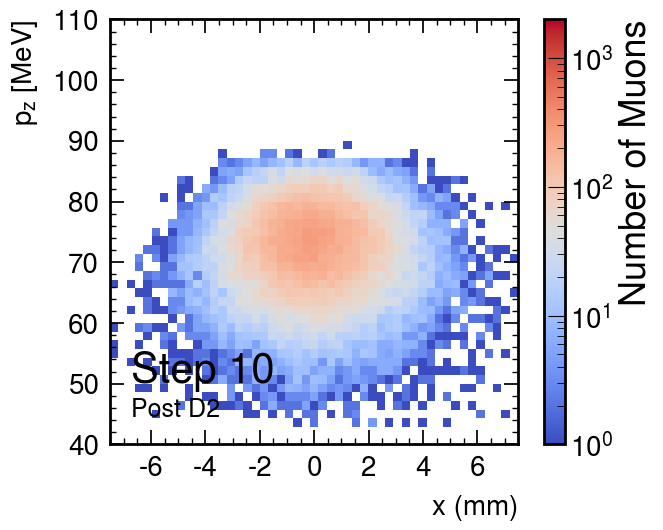

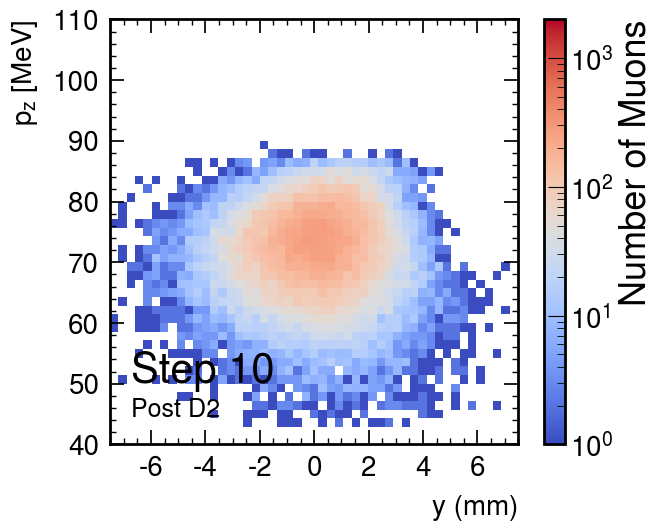

In [57]:
bins = {
    "x"  : np.linspace(-7.5, 7.5, 50),
    "y"  : np.linspace(-7.5, 7.5, 50),
    "t"  : np.linspace(-10, 10, 50),
    "Px" : np.linspace(-30, 30, 50),
    "Py" : np.linspace(-30, 30, 50),
    "Pz" : np.linspace(40, 110, 50),
}
zlog = True
cmap = "coolwarm" # "OrRd"

for i, [step_name, [name, df]] in enumerate(zip(STEP_NAMES, PLOT_TARGETS)):
    for j, ((xaxis, yaxis), (xlabel, ylabel)) in enumerate(PLOTS):
        
        # make plot
        fig = plt.figure(figsize=(6, 5))
        ax = plt.axes([0.1, 0.1, 0.85, 0.85])

        if zlog: 
            h = plt.hist2d(df[xaxis], df[yaxis], bins=[bins[xaxis], bins[yaxis]], cmap=cmap, norm=mpl.colors.LogNorm(vmin=10**0, vmax=2*10**3))
        else:
            h = plt.hist2d(df[xaxis], df[yaxis], bins=[bins[xaxis], bins[yaxis]], cmap=cmap, vmin=0, vmax=2*10**3)
        
        # set labels
        ax.set_xlabel(xlabel, fontsize=20, labelpad=9, horizontalalignment='right', x=1.0)
        ax.set_ylabel(ylabel, fontsize=20, labelpad=9, horizontalalignment='right', y=1.0)
        cbar = plt.colorbar(label="Number of Muons")
        cbar.ax.tick_params(labelsize=20) 
        
        # tick params
        tick_params_major = {"which"     : "major",
                             "length"    : 10,
                             "width"     : 1.25,
                             "direction" : "in",
                             "right"     : True,
                             "top"       : True,
                             "labelsize" : 20,
                             "pad"       : 8}
        tick_params_minor = {"which"     : "minor",
                             "length"    : 4,
                             "width"     : 1,
                             "direction" : "in",
                             "right"     : True,
                             "top"       : True,
                             "labelsize" : 20}
        
        # ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        # ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(**tick_params_major)
        ax.tick_params(**tick_params_minor)
        plt.locator_params(axis='y', nbins=5 if j==2 else 8)
        plt.locator_params(axis='x', nbins=7 if j==2 else 8)

        # text
        plt.text(0.05, 0.22, f"Step {i}", fontsize=30, ha='left', va='top', transform=plt.gca().transAxes)
        plt.text(0.05, 0.11, step_name, fontsize=18, ha='left', va='top', transform=plt.gca().transAxes)
        
        # output name
        outFileName = os.path.join(path, "pdfs/steps", f"{name}_{xaxis}_{yaxis}_{'log' if zlog else 'lin'}.pdf")
        print(outFileName)
        plt.savefig(outFileName, bbox_inches="tight")